In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
#import seaborn as sns
#pip install seaborn

In [2]:
# Read first csv as a dataframe
city_data = pd.read_csv("city_data.csv")
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# Read first csv as a dataframe
ride_data = pd.read_csv("ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
merge_data = (pd.merge(city_data, ride_data, on="city"))
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [34]:
#drivers = merge_data.groupby["driver_count"].nunique()
#drivers


TypeError: 'method' object is not subscriptable

In [5]:
#BUBBLE CHART that showcases the relationship between four key variables
# Average Fare ($) Per City 
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [35]:
total_drivers = merge_data.loc[:, "driver_count"].nunique()
total_drivers

54

74958

In [6]:

city_type = merge_data.groupby("type").sum()
city_type = city_type.reset_index(level=None, drop=False, inplace=False)
city_type

,type,driver_count,fare,ride_id
0,Rural,727,4255.09,658729360193746
1,Suburban,9730,20335.69,3139583688401015
2,Urban,64501,40078.34,7890194186030600


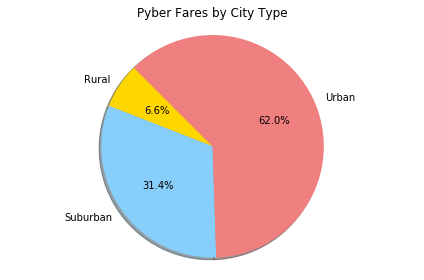

In [23]:
# Pie chart #1
plt.pie(
    # using data from groupby
    city_type['fare'],
    # with the labels being types of city
    labels=city_type['type'],
    # with shadows
    shadow=True,
    # with colors
    colors=["Gold", "#87cefa", "#f08080"],
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("Pyber Fares by City Type")

# View the plot
plt.tight_layout()
plt.show()

In [19]:
#total_rides = len(merge_data['date'])
#total_rides

total_rides = merge_data.groupby("type").count()["ride_id"]*100
total_rides = total_rides.to_frame()
total_rides = total_rides.reset_index(level=None, drop=False, inplace=False)
total_rides
#school_percent_passing_math = school_percent_passing_math.to_frame()


,type,ride_id
0,Rural,12500
1,Suburban,65700
2,Urban,162500


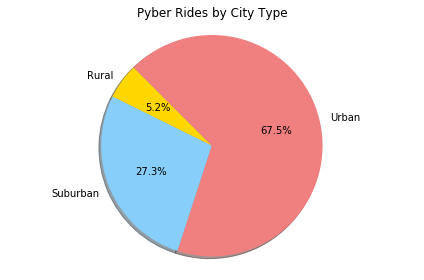

In [24]:
# Pie chart 2
# % of Total Rides by City Type

plt.pie(
    # using data from groupby
    total_rides['ride_id'],
    # with the labels being types of city
    labels=total_rides['type'],
    # with shadows
    shadow=True,
    # with colors
    colors=["Gold", "#87cefa", "#f08080"],
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("Pyber Rides by City Type")

# View the plot
plt.tight_layout()
plt.show()

In [44]:
drivers = city_data.groupby("type").sum()["driver_count"]
# Calculate total fares
#total_drivers = merge_data.loc[:,"driver_count"]
#total_drivers = total_drivers.sum()
drivers = drivers.to_frame()
drivers = drivers.reset_index(level=None, drop=False, inplace=False)
drivers

,type,driver_count
0,Rural,104
1,Suburban,638
2,Urban,2607


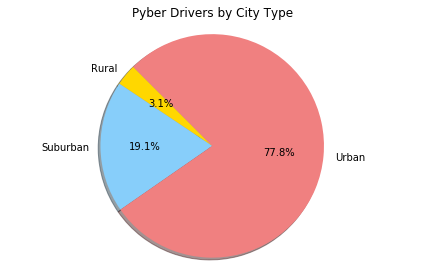

In [45]:
# Pie chart 3 
# % of Total Drivers by City Type

# Pie chart #1
plt.pie(
    # using data from groupby
    drivers['driver_count'],
    # with the labels being types of city
    labels=city_type['type'],
    # with shadows
    shadow=True,
    # with colors
    colors=["Gold", "#87cefa", "#f08080"],
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("Pyber Drivers by City Type")

# View the plot
plt.tight_layout()
plt.show()

In [ ]:
#You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.